# Farmer Credit Scoring Model

This project develops a predictive model to assess repayment likelihood among smallholder farmers using financial and operational indicators.

## Business Objective

To design a classification model that predicts whether a farmer will repay a loan (1 = Paid, 0 = Unpaid), based on leverage and operational financial ratios.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Simulation

The dataset includes demographic, operational, and financial variables.  
Repayment probability is designed to depend strongly on:

- Loan-to-Asset Ratio  
- Operating Expense-to-Income Ratio  

These reflect financial stress indicators.

In [7]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 500

data = pd.DataFrame({
    "age": np.random.randint(21, 65, n),
    "education_years": np.random.randint(0, 18, n),
    "farming_experience_years": np.random.randint(1, 40, n),
    "distance_to_loan_source_km": np.random.uniform(1, 50, n),
    "loan_to_asset_ratio": np.random.uniform(0.1, 1.5, n),
    "operating_expense_to_income_ratio": np.random.uniform(0.2, 1.2, n),
    "farm_size_hectares": np.random.uniform(0.5, 20, n)
})

# Probability of repayment depends strongly on the financial ratios
repayment_probability = (
    1 
    - 0.6 * data["loan_to_asset_ratio"] 
    - 0.5 * data["operating_expense_to_income_ratio"]
)

# Add some randomness
repayment_probability += np.random.normal(0, 0.1, n)

# Convert probability to binary outcome
data["default"] = np.where(repayment_probability > 0, 1, 0)

data.head()

,age,education_years,farming_experience_years,distance_to_loan_source_km,loan_to_asset_ratio,operating_expense_to_income_ratio,farm_size_hectares,default
0,59,6,26,16.285648,0.425704,0.426351,12.264190,1
1,49,3,35,16.716394,0.409124,0.930246,9.731317,1
2,35,17,25,36.496711,0.343254,0.798808,1.664472,1
3,63,12,26,37.546014,1.018013,0.264491,13.597024,1
4,28,10,11,10.817598,1.287222,1.077239,11.853071,0


In [9]:
data["default"].value_counts()

default
1    353
0    147
Name: count, dtype: int64

## Exploratory Data Analysis

We examine summary statistics and correlations to understand relationships between financial indicators and repayment outcome.

In [25]:
data.describe()

,age,education_years,farming_experience_years,distance_to_loan_source_km,loan_to_asset_ratio,operating_expense_to_income_ratio,farm_size_hectares,default
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,43.116000,8.264000,20.766000,25.242551,0.785794,0.707591,10.544639,0.706000
std,12.733217,5.153583,11.116943,13.374092,0.413185,0.289930,5.543109,0.456048
min,21.000000,0.000000,1.000000,1.016293,0.100264,0.202104,0.508634,0.000000
25%,32.000000,4.000000,11.000000,13.522459,0.415539,0.456533,5.956839,0.000000
50%,44.000000,8.000000,21.500000,26.047317,0.780829,0.729285,10.613681,1.000000
75%,53.000000,13.000000,30.000000,36.038222,1.149089,0.954173,15.537077,1.000000
max,64.000000,17.000000,39.000000,49.778544,1.495909,1.199714,19.991106,1.000000


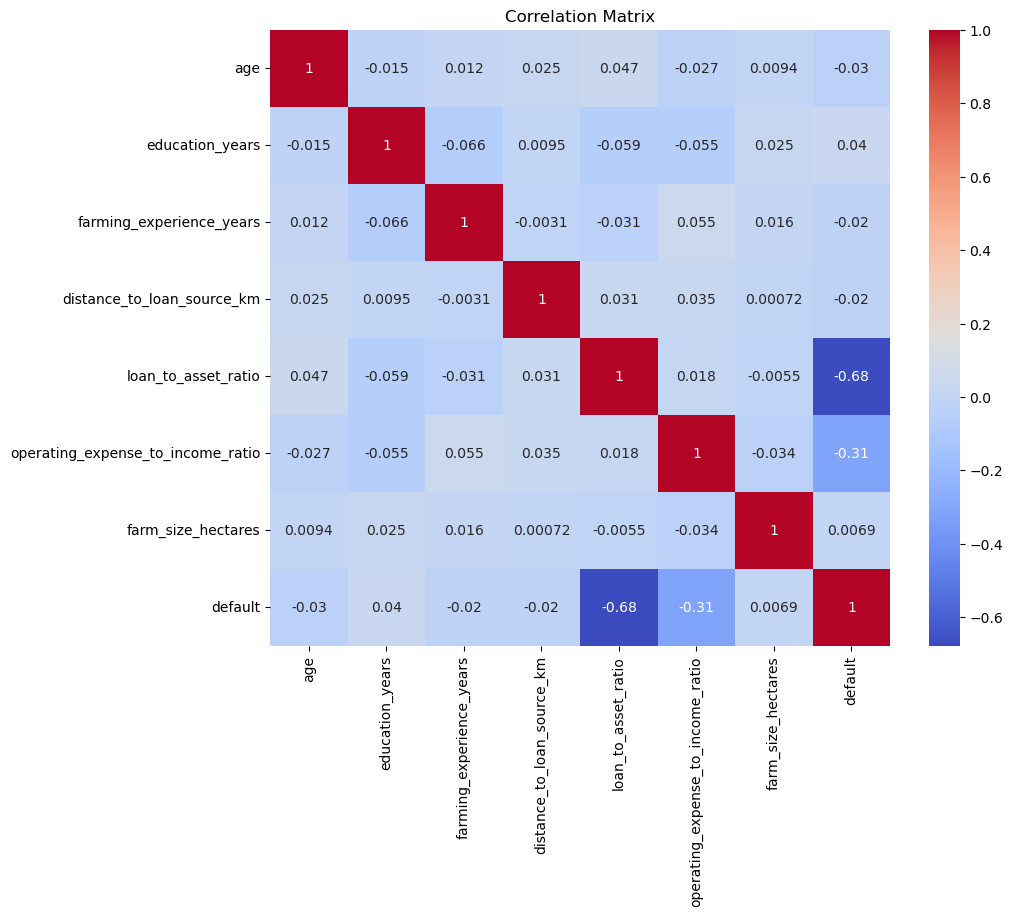

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Model Preparation

The dataset is split into training and testing sets (80/20 split).

## Random Forest Model

A Random Forest classifier is used to capture nonlinear interactions between financial ratios and repayment outcomes.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = data.drop("default", axis=1)
y = data["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.92      0.99      0.95        72

    accuracy                           0.93       100
   macro avg       0.94      0.89      0.91       100
weighted avg       0.93      0.93      0.93       100



## Feature Importance

Feature importance helps identify which variables most influence repayment prediction.

Matplotlib is building the font cache; this may take a moment.


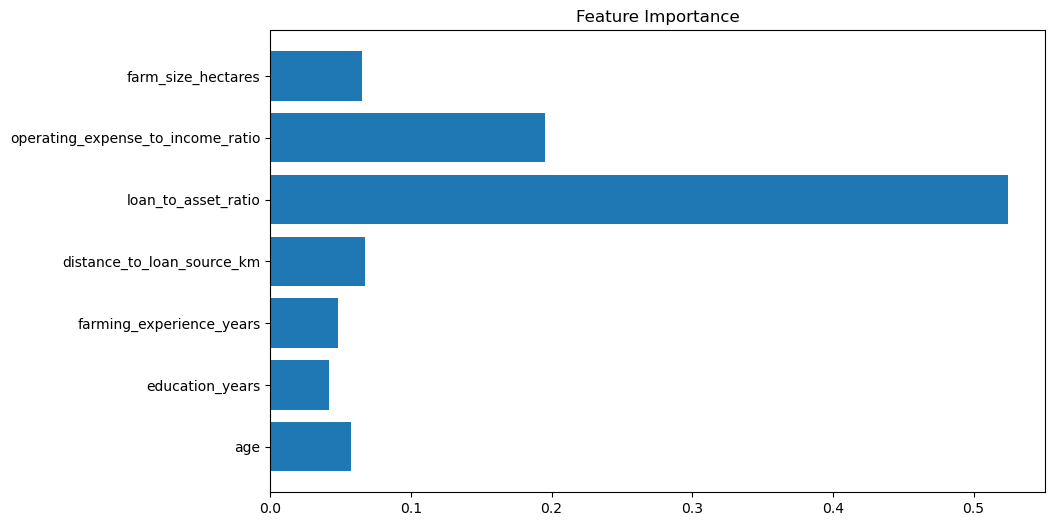

In [13]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

In [15]:
import numpy as np

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[22  6]
 [ 1 71]]


## Logistic Regression Comparison

Logistic Regression is implemented as a benchmark linear model.

In [17]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_predictions = log_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, log_predictions))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.96      0.96      0.96        72

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



## Business Insights

- Loan-to-Asset Ratio is the strongest predictor of repayment.
- High operating cost pressure reduces repayment likelihood.
- The model achieves strong predictive performance while maintaining interpretability.